### Corner Detection
****


Corner detection is a fundamental task in computer vision that involves identifying the locations of corners or points of interest in an image. Corners are important features in images because they can be used to determine the geometry of objects and scenes, as well as track objects as they move through a video stream. Corner detection algorithms operate by analyzing the gradient or intensity of an image at each pixel and searching for locations where the gradients change abruptly in multiple directions.

Corner detection has a wide range of applications in computer vision, including object recognition, image registration, motion detection, and stereo vision. It is a challenging problem because corners can be difficult to distinguish from other types of image features, and because they can occur at different scales and orientations. Over the years, many different corner detection algorithms have been developed, ranging from simple methods like Harris corner detection to more sophisticated approaches based on machine learning and deep learning.

The <b>Harris Corner Detector</b> is an algorithm used for detecting corners in images. Corners are points in an image where there are large variations in intensity in all directions. They are important features in image processing, as they can be used for tasks such as object recognition, tracking, and matching.

The Harris Corner Detector algorithm calculates a response function at each pixel location in an image, which is used to determine whether that location is a corner or not. The response function is based on the difference in intensity between neighboring pixels, and is calculated as follows:

<ol>
<li>Calculate the gradient of the image using a Sobel filter.  This gives us a measure of the change in intensity at each pixel location in both the horizontal and vertical directions.</li>
<li>Compute the products of gradients at each pixel location. This gives us a measure of how much the intensity changes in all directions.</li>
<li>Convolve the product of gradients with a Gaussian window to obtain a weighted sum of products of gradients in a local neighborhood.  This helps to give more weight to the pixels that are closer to the center of the neighborhood.</li>
<li>Calculate the Harris response function at each pixel location as the determinant of a matrix formed from the weighted sum of products of gradients, and the sum of squares of gradients at that location.  This is done by using a mathematical formula that combines the weighted sum of products of gradients with the sum of squares of gradients at that location.</li>
</ol>

For those who want a full explanation of the Harris response function.

The Harris response function is given by the formula:

R = det(M) - k * (trace(M))^2

where:
<ul>
<li>det(M)=λ1λ2</li>
<li>trace(M)=λ1+λ2</li>
<li>λ1 and λ2 are the eigenvalues of M</li>
</ul>
So the magnitudes of these eigenvalues decide whether a region is a corner, an edge, or flat.

<ul>
<li>When |R| is small, which happens when λ1 and λ2 are small, the region is flat.</li>
<li>When R<0, which happens when λ1>>λ2 or vice versa, the region is edge.</li>
<li>When R is large, which happens when λ1 and λ2 are large and λ1∼λ2, the region is a corner.</li>
</ul>
It can be represented in a nice picture as follows:

<img src='Graphics/harris.png'><p>

In the Harris Corner Detector algorithm, the determinant of the matrix M is used as a measure of the amount of variation in the gradient of the image in a local neighborhood around the pixel. When the determinant is large, it means that there is significant variation in the gradient in all directions around the pixel, which is a characteristic of a corner.

The second term in the Harris response function formula is a scaled version of the squared trace of the matrix M. The trace of a matrix is the sum of its diagonal elements. In the Harris Corner Detector algorithm, the trace of M is used as a measure of the sum of the squared gradients around the pixel. The squared trace is then multiplied by a constant k, which is empirically determined.

The purpose of the second term in the Harris response function formula is to reduce the number of false positives detected as corners. In areas of the image where there is no significant variation in the gradient, the determinant of M will be small, but the squared trace of M will still be relatively large. By subtracting the scaled squared trace from the determinant, the Harris response function is able to distinguish between true corners and areas of the image with no significant variation in the gradient.

The determinant of a matrix is a scalar value that can be calculated from the matrix's elements. It is a measure of how the matrix scales the area of a unit square when it is transformed by the matrix. Specifically, the determinant is calculated as follows:

If we have a 2x2 matrix A = [a, b; c, d], the determinant of A is given by:

det(A) = ad - bc

The Harris response function is used to determine whether a pixel location is a corner or not. Pixels with high values of R are considered corners, while those with low values of R are not. The corners can then be identified by thresholding the response function, and performing non-maximum suppression to remove duplicate corners.

In summary, the Harris Corner Detector algorithm calculates the Harris response function at each pixel location in an image, and uses this function to detect corners. The algorithm is widely used in computer vision applications, and has been shown to be robust to noise, occlusion, and other image artifacts.


#### cv2.cornerHarris()<p>

img - Input image. It should be grayscale and float32 type.<br>
blockSize - It is the size of neighbourhood considered for corner detection<br>
ksize - Aperture parameter of the Sobel derivative used.<br>
k - Harris detector free parameter in the equation.<br>

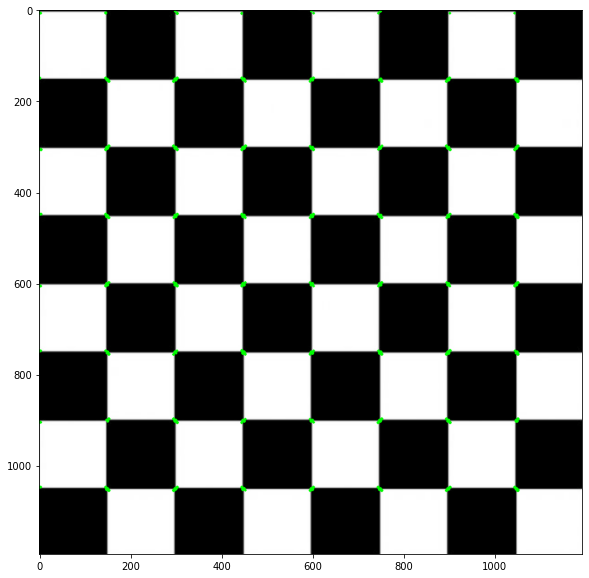

In [2]:
# Harris Corner Detection

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("Graphics/Checkbox.png")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to float 32
gray = np.float32(gray)

# Perform Harris Corner Detection
dst = cv2.cornerHarris(gray, 2, 5, 0.07)

# Threshold
ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
dst = np.uint8(dst)

# Find contours
contours, hierarchy = cv2.findContours(dst, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around the corners
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 4)

plt.figure(figsize=(10,10))
plt.imshow(img)


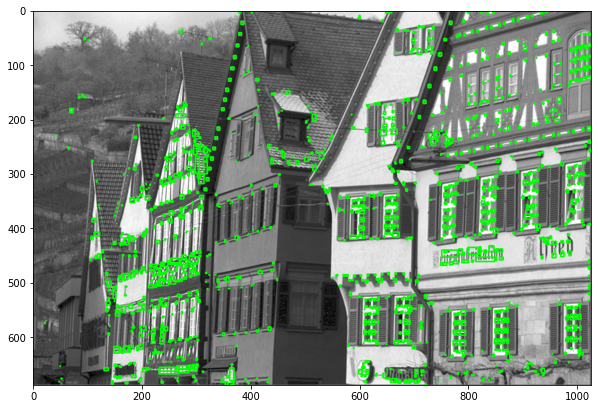

In [12]:
# Harris Corner Detection on Building

img = cv2.imread("Graphics/building.png")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 5, 5, 0.2)

ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
dst = np.uint8(dst)

contours, hierarchy = cv2.findContours(dst, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around the corners
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

plt.figure(figsize=(10,10))
plt.imshow(img)


The <b>Shi-Tomasi Corner Detector</b> is an algorithm used for detecting corners in images, similar to the Harris Corner Detector. It was developed by Jianbo Shi and Carlo Tomasi in 1994 as an improvement over the Harris Corner Detector.

The Shi-Tomasi Corner Detector uses a different measure of corner quality than the Harris Corner Detector, which makes it more reliable and accurate in some cases. Instead of using the Harris response function, the Shi-Tomasi Corner Detector uses the minimum eigenvalue of a matrix formed from the gradients of the image.

The algorithm works as follows:

<ol>
<li>Compute the gradient of the image using a Sobel filter.</li>
<li>Compute the minimum eigenvalue of a 2x2 matrix formed from the gradients in a small window around each pixel location.</li>
<li>Sort the eigenvalues in ascending order, and select the minimum eigenvalue as the measure of corner quality for that pixel location.</li>
<li>Threshold the minimum eigenvalues to obtain a list of candidate corners.</li>
<li>Perform non-maximum suppression to eliminate duplicate corners.</li>

</ol>

Eigenvalues are a way to measure how much a matrix can stretch or shrink vectors, like stretching or compressing a rubber band. They are a set of special numbers that are associated with a matrix. When a matrix is applied to one of its special vectors, called an eigenvector, the eigenvector is stretched or shrunk by a factor equal to its corresponding eigenvalue. 

The reason why the minimum eigenvalue is used is because it measures the curvature of the image around a pixel in all directions, which makes it more robust to image noise and variation than other measures like the Harris response function. The Shi-Tomasi Corner Detector selects the pixels with the highest minimum eigenvalues as the corners of the image, which are the locations with the most significant curvature.

The minimum eigenvalue is used as the measure of corner quality because it is sensitive to changes in all directions, unlike the Harris response function which is sensitive to changes in specific directions. This makes the Shi-Tomasi Corner Detector more reliable and accurate in detecting corners than the Harris Corner Detector.

The algorithm can be further improved by using a quality score based on the minimum eigenvalue and the distance between corners, instead of just the minimum eigenvalue. This is called the "good features to track" algorithm, and is often used in computer vision applications.

In summary, the Shi-Tomasi Corner Detector is an algorithm used for detecting corners in images. It uses the minimum eigenvalue of a matrix formed from the gradients of the image as the measure of corner quality, making it more reliable and accurate than the Harris Corner Detector in some cases.

#### cv.goodFeaturesToTrack()

maxCorners - Maximum number of corners to return.<br>
qualityLevel - Parameter characterizing the minimal accepted quality of image corners.<br>
minDistance - Minimum possible Euclidean distance between the returned corners.<br>

It finds N strongest corners in the image by Shi-Tomasi method (or Harris Corner Detection, if you specify it). As usual, image should be a grayscale image. Then you specify number of corners you want to find. Then you specify the quality level, which is a value between 0-1, which denotes the minimum quality of corner below which everyone is rejected. Then we provide the minimum euclidean distance between corners detected.

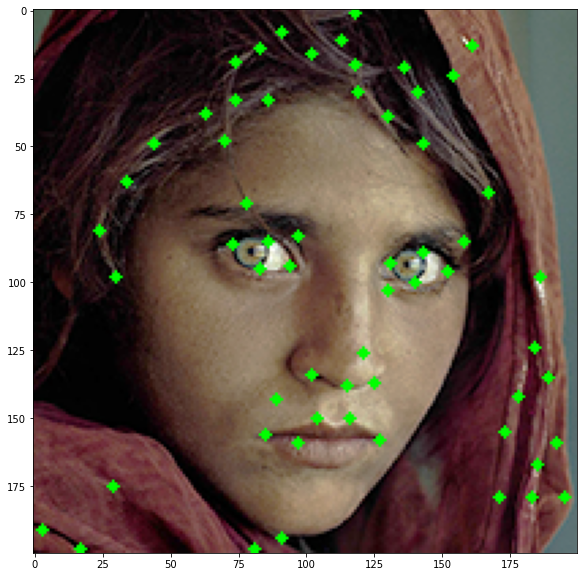

In [14]:
# Shi-Tosami Corner Detection

img = cv2.imread("Graphics/face.png")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define parameters 
max_corners = 100
quality_level = 0.03
min_distance = 10

corners = cv2.goodFeaturesToTrack(gray, max_corners, quality_level, min_distance)

for corner in corners:
    x, y = corner.ravel().astype(int)
    cv2.circle(img, (x,y), 2, (0,255,0), -1)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img)
